In [38]:
import matplotlib.pyplot as plt
import numpy as np
from dipy.io.image import load_nifti
import pandas as pd
import sklearn.cluster
import pathlib
from scipy.stats import norm, ttest_ind, iqr
from sklearn.mixture import GaussianMixture

In [2]:
'''
path segmented training images, either *_tumor.npy or *_clean.npy
'''
path_to_seg_images = "/N/project/laidel_el_mcv/LAIDEL-MRI-tumor-id/seg_images"

'''
path to segmented image, e.g. 
'''
path_to_seg_hat = "/N/project/laidel_el_mcv/LAIDEL-MRI-tumor-id/results/kmeans_classified"

#All tumor values
tumor_points = []
tumor_means =[]
tumor_sds =[]

liklihood_clean = []
t_test_clean =[]

likelihood_tumor = []
t_test_tumor = []

likelihood_tumor_hat = []
t_test_tumor_hat = []


In [3]:
'''
Build set of all tumor pixels
'''

def gather_tumor_loop(path):  
    data_id = path.parts[len(path.parts)-1]


    if "tumor" in data_id:

        tumor = np.load(str(path))
        tumor_masked = tumor[tumor != 0 ]
        tumor_points.extend( list(tumor_masked.flatten()))
        
        tumor_means.append(np.mean(tumor_masked))
        tumor_sds.append(np.std(tumor_masked))

#list comprehension
[gather_tumor_loop(path) for path in pathlib.Path(path_to_seg_images).iterdir()]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [8]:
tumor_means_arr = np.asarray(tumor_means)
tumor_means

[513.9576096771307,
 222.0168222856702,
 960.4642141956538,
 444.9477116765402,
 590.1893461788001,
 395.18137130534063,
 197.27310331520363,
 265.48886571489214,
 879.8572910835939,
 333.13798203429815,
 640.8060852421484,
 291.3160410964771,
 1511.813448327274,
 225.7450376937629,
 1809.196428818412,
 525.4169070320653,
 439.38827273152697,
 541.5077237575454,
 266.7167520930587,
 381.46607219289484,
 276.2325271835007,
 270.1223587753342,
 430.8677716639098,
 614.8117316697646,
 204.07147430411604,
 1097.3334,
 569.0642,
 650.5610681926562,
 22670.734372898798,
 1269.8805566787976,
 534.1145376191041,
 482.5311437564259,
 301.50859580155264,
 752.3586552296189,
 336.4891760352924,
 269.8656084041905,
 446.3799443083839,
 500.7281426894403,
 485.5349,
 120.10031988919302,
 537.3727193614212,
 835.4461582678674,
 662.5407349457809,
 221.35719879070228,
 380.3149588077386,
 1218.7456,
 547.3704340407932,
 656.0696588063829,
 746.0543957481932,
 490.6671088391355,
 348.96857893061747,
 

In [49]:
tumor_means_no_outlier =tumor_means_arr[tumor_means_arr < 1000]
#tumor_means_no_outlier=tumor_means_no_outlier/np.max(tumor_means_no_outlier)

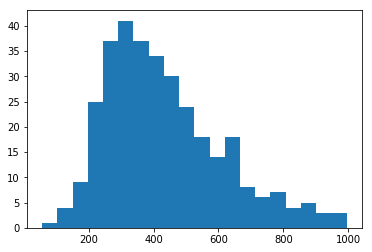

In [50]:
plt.figure()
plt.hist(tumor_means_no_outlier, bins=20)
plt.show()

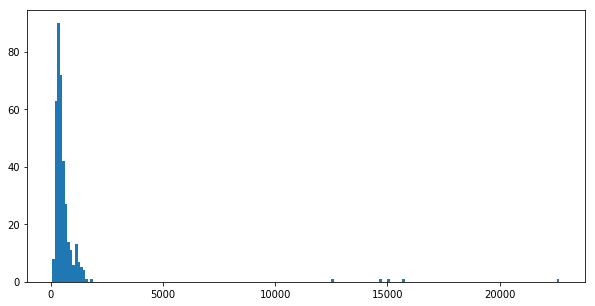

In [67]:
plt.figure(figsize=(10, 5))
plt.hist(tumor_means_arr, bins=200)
plt.show()

In [51]:
np.mean(tumor_means_no_outlier )

433.17093230375787

In [52]:
np.median(tumor_means_no_outlier )

402.66230585664823

In [53]:
np.std(tumor_means_arr)

1874.187765887942

In [56]:
gm = GaussianMixture(n_components=2, random_state=0).fit(tumor_means_no_outlier.reshape(-1, 1))

In [57]:
gm.means_

array([[345.67693303],
       [630.43451712]])

In [58]:
gm.covariances_

array([[[10686.87162749]],

       [[24754.06557475]]])

In [ ]:
#Test - mean and variance based off gm mean and variance 

In [59]:
tumor_training_mean = gm.means_[0][0]
tumor_training_mean

345.6769330255097

In [62]:
tumor_training_std = np.sqrt(gm.covariances_[0][0])
tumor_training_std

array([103.37732647])

# Nontumor tissue

In [84]:
'''
Build set of all tumor pixels
'''
clean_means=[]
clean_means_dct ={}
clean_sds=[]

def gather_clean_loop(path):  
    data_id = path.parts[len(path.parts)-1]


    if "clean" in data_id:
        print(data_id)
        tumor = np.load(str(path))
        tumor_masked = tumor[tumor != 0 ]
        #tumor_points.extend( list(tumor_masked.flatten()))
        
        clean_means.append(np.mean(tumor_masked))
        clean_sds.append(np.std(tumor_masked))
        clean_means_dct[data_id]=np.mean(tumor_masked)

#list comprehension
[gather_clean_loop(path) for path in pathlib.Path(path_to_seg_images).iterdir()]


BraTS20_Training_101_clean.npy
BraTS20_Training_349_clean.npy
BraTS20_Training_127_clean.npy
BraTS20_Training_035_clean.npy
BraTS20_Training_111_clean.npy
BraTS20_Training_299_clean.npy
BraTS20_Training_215_clean.npy
BraTS20_Training_097_clean.npy
BraTS20_Training_352_clean.npy
BraTS20_Training_145_clean.npy
BraTS20_Training_175_clean.npy
BraTS20_Training_053_clean.npy
BraTS20_Training_169_clean.npy
BraTS20_Training_291_clean.npy
BraTS20_Training_117_clean.npy
BraTS20_Training_027_clean.npy
BraTS20_Training_210_clean.npy
BraTS20_Training_123_clean.npy
BraTS20_Training_315_clean.npy
BraTS20_Training_274_clean.npy
BraTS20_Training_335_clean.npy
BraTS20_Training_365_clean.npy
BraTS20_Training_288_clean.npy
BraTS20_Training_182_clean.npy
BraTS20_Training_243_clean.npy
BraTS20_Training_368_clean.npy
BraTS20_Training_194_clean.npy
BraTS20_Training_276_clean.npy
BraTS20_Training_055_clean.npy
BraTS20_Training_049_clean.npy
BraTS20_Training_196_clean.npy
BraTS20_Training_284_clean.npy
BraTS20_

BraTS20_Training_213_clean.npy
BraTS20_Training_005_clean.npy
BraTS20_Training_171_clean.npy
BraTS20_Training_174_clean.npy
BraTS20_Training_095_clean.npy
BraTS20_Training_065_clean.npy
BraTS20_Training_277_clean.npy
BraTS20_Training_367_clean.npy
BraTS20_Training_289_clean.npy
BraTS20_Training_109_clean.npy
BraTS20_Training_186_clean.npy
BraTS20_Training_271_clean.npy
BraTS20_Training_200_clean.npy
BraTS20_Training_138_clean.npy
BraTS20_Training_264_clean.npy
BraTS20_Training_233_clean.npy
BraTS20_Training_147_clean.npy
BraTS20_Training_295_clean.npy
BraTS20_Training_337_clean.npy
BraTS20_Training_159_clean.npy
BraTS20_Training_190_clean.npy
BraTS20_Training_177_clean.npy
BraTS20_Training_036_clean.npy
BraTS20_Training_100_clean.npy
BraTS20_Training_322_clean.npy
BraTS20_Training_048_clean.npy
BraTS20_Training_076_clean.npy
BraTS20_Training_157_clean.npy
BraTS20_Training_187_clean.npy
BraTS20_Training_342_clean.npy
BraTS20_Training_326_clean.npy
BraTS20_Training_026_clean.npy
BraTS20_

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [73]:
np.mean(clean_means)

438.0432869021443

In [74]:
np.mean(clean_sds)

113.41000699533602

In [76]:
np.median(clean_means)

230.3591093117409

In [78]:
iqr(clean_means)

236.07406555152687

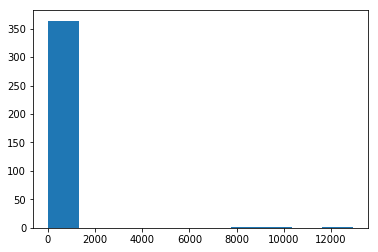

In [82]:
plt.figure()
plt.hist(clean_means)
plt.show()

In [80]:
clean_means_no_outlier = np.asarray(clean_means)[np.asarray(clean_means)<2000]

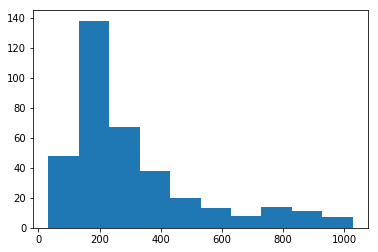

In [81]:
plt.figure()
plt.hist(clean_means_no_outlier)
plt.show()

In [83]:
np.mean(clean_means_no_outlier)

309.89159656406446

#### Look at outliers

In [85]:
clean_means_dct

{'BraTS20_Training_101_clean.npy': 123.40062055863143,
 'BraTS20_Training_349_clean.npy': 240.27644,
 'BraTS20_Training_127_clean.npy': 223.79993298387586,
 'BraTS20_Training_035_clean.npy': 212.5722622333047,
 'BraTS20_Training_111_clean.npy': 180.87124450065528,
 'BraTS20_Training_299_clean.npy': 496.7609700974427,
 'BraTS20_Training_215_clean.npy': 134.77690053170795,
 'BraTS20_Training_097_clean.npy': 141.2914573237865,
 'BraTS20_Training_352_clean.npy': 430.74783,
 'BraTS20_Training_145_clean.npy': 146.0427981908,
 'BraTS20_Training_175_clean.npy': 156.72173604719586,
 'BraTS20_Training_053_clean.npy': 173.87302229817243,
 'BraTS20_Training_169_clean.npy': 495.9056538386033,
 'BraTS20_Training_291_clean.npy': 80.01481850660609,
 'BraTS20_Training_117_clean.npy': 191.09979320474034,
 'BraTS20_Training_027_clean.npy': 253.26639967095838,
 'BraTS20_Training_210_clean.npy': 159.75101066353994,
 'BraTS20_Training_123_clean.npy': 210.50415739439578,
 'BraTS20_Training_315_clean.npy': 92

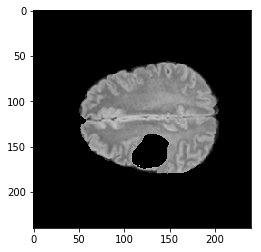

In [95]:
outlier = np.load(path_to_seg_images+"/BraTS20_Training_315_clean.npy")
plt.figure()
plt.imshow(outlier[:,:,100], cmap="gray")
plt.show()

In [99]:
to = outlier[:,:,100]
np.mean(to[to!=0])

9307.438656419015

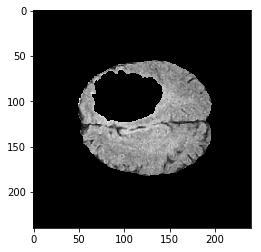

In [97]:
normal = np.load(path_to_seg_images+"/BraTS20_Training_291_clean.npy")
plt.figure()
plt.imshow(normal[:,:,100], cmap="gray")
plt.show()

In [100]:
no =normal[:,:,100]
np.mean(no[no!=0])

83.6310687866678

# Use full tumor points

In [27]:
            
tumor_points_arr = (np.asarray(tumor_points)).flatten()
tumor_training_mean = np.mean(tumor_points_arr)
tumor_training_std = np.std(tumor_points_arr)

In [28]:
tumor_points_truncated=tumor_points_arr[tumor_points_arr < 3000]


In [40]:
tumor_points_highval = tumor_points_arr[tumor_points_arr > 3000]

In [29]:
tumor_training_mean

815.87366

In [30]:
tumor_training_std

2252.6353

In [31]:
np.unique(tumor_points_arr)

array([1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 2.9278e+04, 2.9355e+04,
       2.9422e+04], dtype=float32)

In [32]:
np.median(tumor_points_arr)

448.0

In [33]:
iqr(tumor_points_arr)

360.0

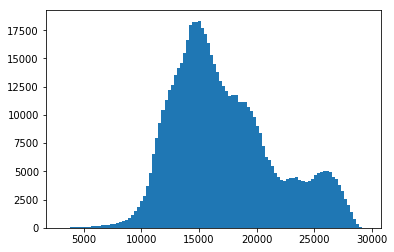

In [41]:
plt.figure()
plt.hist(tumor_points_highval, bins=100)

plt.show()

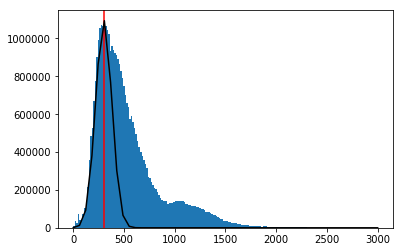

In [72]:
plt.figure()
plt.hist(tumor_points_truncated, bins=200)
plt.axvline(300, color="red")
x=np.linspace(0, 3000)
plt.plot(x, norm.pdf(x, 300, 80)*220000000, color="black")
plt.show()

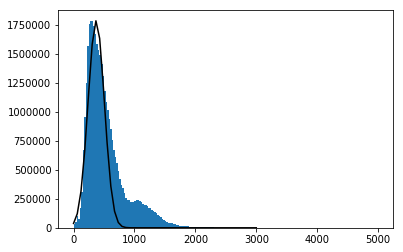

In [106]:
plt.figure()
plt.hist(tumor_points_arr[tumor_points_arr < 5000], bins=200)
x=np.linspace(0, 3000)
plt.plot(x, norm.pdf(x, 372, 134)*6e8, color="black")

plt.show()

In [74]:
from sklearn.mixture import GaussianMixture

In [76]:
gm = GaussianMixture(n_components=6, random_state=0).fit(tumor_points_arr.reshape(-1, 1))

In [82]:
np.sqrt(gm.covariances_)

array([[[ 370.97878457]],

       [[1461.46392446]],

       [[ 134.11621396]],

       [[1806.3940691 ]],

       [[1848.51970975]],

       [[1613.04454656]]])

In [83]:
gm.means_

array([[  827.07168197],
       [15466.05614596],
       [  372.35408266],
       [25062.42285279],
       [12686.29315222],
       [19321.08926096]])

In [ ]:
ttest_ind(target_masked, norm.rv(100, 372, 134), equal_var = False)

# Comparison

In [63]:
#Compare training class tumors with other types of tissues

def comparison_tumor_loop(path, data_tag, likelihood_list, t_test_list):  
    data_id = path.parts[len(path.parts)-1]


    if data_tag in data_id:

        target = np.load(str(path)).flatten()
        target_masked = target[target!=0]
        #calculate liklihood - Is this mean in line with the global mean assuming normality?
        #likelihood_list.append(norm.pdf(np.mean(target_masked), tumor_training_mean, tumor_training_std))
        
        #perform t-test 
        
        #need to check variance difference for Welch or Student T test
        if abs(np.std(target_masked) -tumor_training_std) >10:
            res = ttest_ind(target_masked, tumor_points_arr, alternative="less")
        else:
            res=ttest_ind(target_masked, tumor_points_arr, alternative="less", equal_var = False)

        t_test_list.append(res[1]) # p-value

In [64]:
liklihood_clean = []
t_test_clean =[]


In [61]:
'''
Iterate thorugh all nontumor material to get metrics (should be low p value)
'''        
#list comprehension
[comparison_tumor_loop(path, "clean", liklihood_clean, t_test_clean) 
     for path in pathlib.Path(path_to_seg_images).iterdir()]



[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [62]:
clean_is_tumor = {"likelihood":liklihood_clean, "T test": t_test_clean}
            

In [64]:
np.mean(np.asarray(liklihood_clean))

0.00016957249063085717

In [65]:
np.mean(np.asarray(t_test_clean))

0.0025500373397969525

In [67]:
'''
Iterate thorugh all labeled tumor material to get metrics (should be very high p value)
'''

#list comprehension
[comparison_tumor_loop(path, "tumor", likelihood_tumor, t_test_tumor)
     for path in pathlib.Path(path_to_seg_images).iterdir()]
            
tumor_is_tumor = {"likelihood":likelihood_tumor, "T test": t_test_tumor}

In [68]:
np.mean(np.asarray(likelihood_tumor))

0.00017161498305650453

In [69]:
np.mean(np.asarray(t_test_tumor))

0.0034662090351609835

In [71]:
'''
Iterate through all segmented material to get metrics (shoudl be high p value)
'''

#list comprehension
[comparison_tumor_loop(path, "", likelihood_tumor_hat, t_test_tumor_hat)
     for path in pathlib.Path(path_to_seg_hat).iterdir()]
   
hat_is_tumor = {"likelihood":likelihood_tumor_hat, "T test": t_test_tumor_hat}    

FileNotFoundError: [Errno 2] No such file or directory: 'N/project/laidel_el_mcv/LAIDEL-MRI-tumor-id/results/kmeans_classified'

In [ ]:
            
np.savez(path_to_results+"/clean_is_tumor.npz", **clean_is_tumor)
np.savez(path_to_results+"/tumor_is_tumor.npz", **tumor_is_tumor)
np.savez(path_to_results+"/hat_is_tumor.npz", **hat_is_tumor)

# slurm script for t test

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from dipy.io.image import load_nifti
import pandas as pd
import sklearn.cluster
import pathlib



'''
path segmented training images, either *_tumor.npy or *_clean.npy
'''
path_to_seg_images = "/N/laidel...."

'''
path to segmented image, e.g. 
'''
path_to_seg_hat = "../results/kmeans-classified"

#All tumor values
tumor_points = []

liklihood_clean = []
t_test_clean =[]

likelihood_tumor = []
t_test_tumor = []

likelihood_tumor_hat = []
t_test_tumor_hat = []

'''
Build set of all tumor pixels
'''

def gather_tumor_loop(path):  
    data_id = path.parts[len(path.parts)-1]


    if "tumor" in data_id:

        tumor = np.load(str(path))
        tumor_points.append(tumor.flatten())

#list comprehension
[gather_tumor_loop(path) for path in pathlib.Path(path_to_seg_images).iterdir()]
            
tumor_points_arr = np.asarray(tumor_points).flatten()
tumor_training_mean = np.mean(tumor_points_arr)
tumor_training_std = np.std(tumor_points_arr)
'''
Iterate thorugh all nontumor material to get metrics (should be low p value)
'''
def comparison_tumor_loop(path, data_tag, likelihood_list, t_test_list):  
    data_id = path.parts[len(path.parts)-1]


    if data_tag in data_id:

        target = np.load(str(path)).flatten()
        
        #calculate liklihood - Is this mean in line with the global mean assuming normality?
        likelihood_list.append(norm.pdf(np.mean(target), tumor_training_mean, tumor_training_std))
        
        #perform t-test 
        
        #need to check variance difference for Welch or Student T test
        if abs(np.std(target) -tumor_train_std) >10:
            res = ttest_ind(target, tumor_points_arr)
        else:
            res=ttest_ind(target, tumor_points_arr, equal_var = False)

        t_test_list.append(res[1]) # p-value

        

#list comprehension
[comparison_tumor_loop(path, "clean", liklihood_clean, t_test_clean) 
     for path in pathlib.Path(path_to_seg_images).iterdir()]

clean_is_tumor = {"likelihood":likelihood_clean, "T test", t_test_clean}
            
'''
Iterate thorugh all labeled tumor material to get metrics (should be very high p value)
'''

#list comprehension
[comparison_tumor_loop(path, "tumor", likelihood_tumor, t_test_tumor)
     for path in pathlib.Path(path_to_seg_images).iterdir()]
            
tumor_is_tumor = {"likelihood":likelihood_tumor, "T test", t_test_tumor}
'''
Iterate through all segmented material to get metrics (shoudl be high p value)
'''

#list comprehension
[comparison_tumor_loop(path, "", likelihood_tumor_hat, t_test_tumor_hat)
     for path in pathlib.Path(path_to_seg_hat).iterdir()]
   
hat_is_tumor = {"likelihood":likelihood_tumor_hat, "T test", t_test_tumor_hat}            
            
np.savez(path_to_results+"/clean_is_tumor.npz", **clean_is_tumor)
np.savez(path_to_results+"/tumor_is_tumor.npz", **tumor_is_tumor)
np.savez(path_to_results+"/hat_is_tumor.npz", **hat_is_tumor)

KeyError: 'True is not a file in the archive'

In [ ]:
res = np.load("../results/tumor_metrics.npz", allow_pickle=True)
dict(res)

In [31]:
res = np.load("../results/nontumor_metrics.npz", allow_pickle=True)
dict(res)

{'BraTS20_Training_232_clean.npy': array([214.59926631,  59.10282921]),
 'BraTS20_Training_230_clean.npy': array([233.55514487,  61.39411202])}